<a href="https://colab.research.google.com/github/draglar/Titanic/blob/main/spambase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Hewlett-Packard Internal-only Technical Report.**

# 1. Defining the Question

## Specifying the Data Analytic Question

> Determine whether a given email is spam or not.

## Defining the Metric for Success

> ~7% misclassification error.
  False positives (marking good mail as spam) are very undesirable.
  If we insist on zero false positives in the training/testing set,
  20-25% of the spam passed through the filter.

## Understanding the context 

* The collection of spam e-mails came from our postmaster and 
individuals who had filed spam.
* The collection of non-spam e-mails came from filed work and personal e-mails, and hence	the word 'george' and the area code '650' are indicators of non-spam

## Recording the Experimental Design

* define the desired algorithm ( Naive bayes)
* Select random subset for the algorith
* generate predictions and evaluate the performance
* re fit the model with a different subsets( 0.2,0.3,0.4 test sizes)

## Data Relevance

> The data is relevant to the question asked.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
name=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet',
      'word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free',
      'word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
       'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85',
      'word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
      'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
      'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total',
      'spam'
]
data =pd.read_csv('https://raw.githubusercontent.com/draglar/Spam/main/spambase.data',names=name)

# Previewing the dataset

* previewing the top of the dataset

In [ ]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


* Previewing the bottom of the dataset

In [ ]:
data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# External datasourse validation

* 48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD,
> i.e. 100 * (number of times the WORD appears in the e-mail) / 
total number of words in e-mail.

* continuous real [0,100] attributes of type char_freq_CHAR
= percentage of characters in the e-mail that match CHAR,
> i.e. 100 * (number of CHAR occurences) / total characters in e-mail

* The last column spam denotes whether the e-mail was 
considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  
 

> More information on the data can be found at http://www.ics.uci.edu/~mlearn/MLRepository.html

# Tidying up the dataset

* Checking for null values

In [ ]:
data.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

* Checking for duplicates

In [ ]:
data.duplicated().sum()

391

In [3]:
data.drop_duplicates(inplace=True)

* Checking for outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


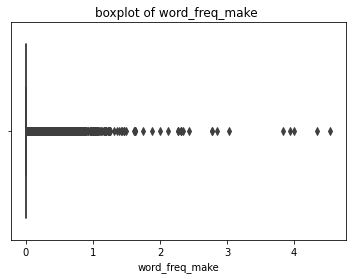

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


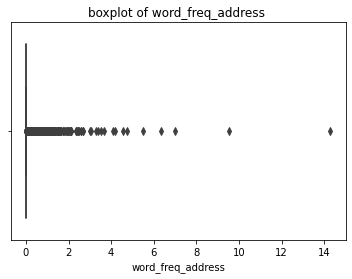

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


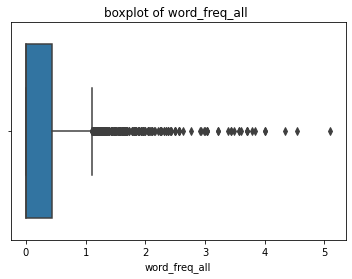

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


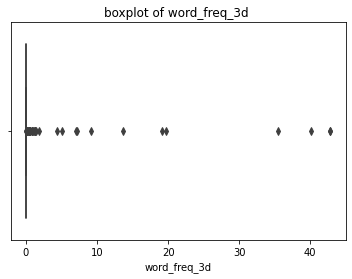

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


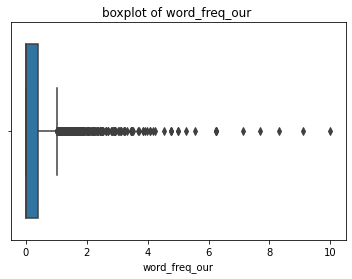

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


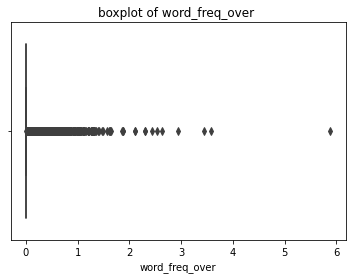

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


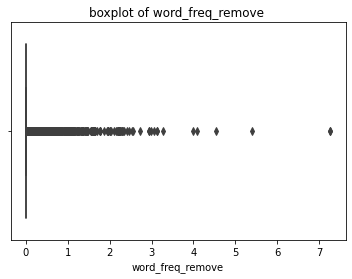

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


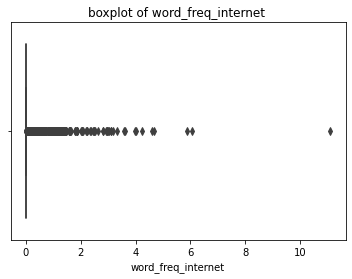

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


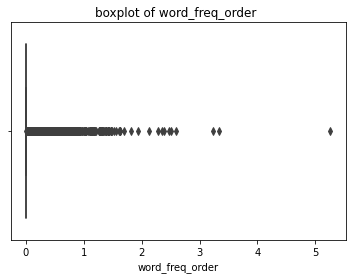

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


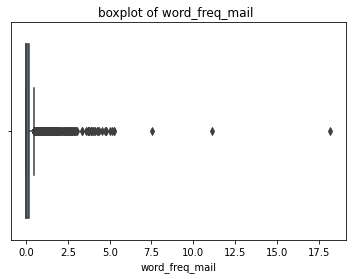

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


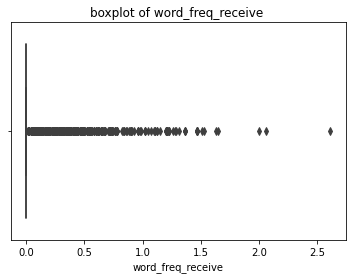

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


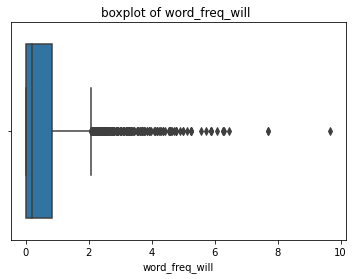

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


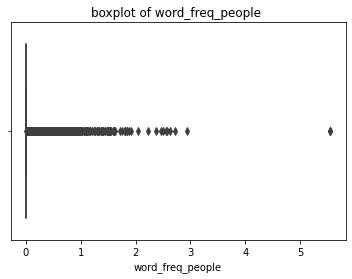

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


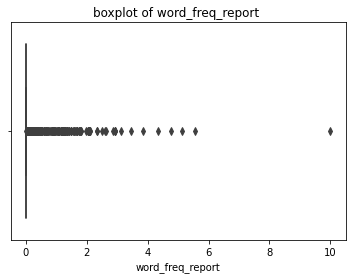

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


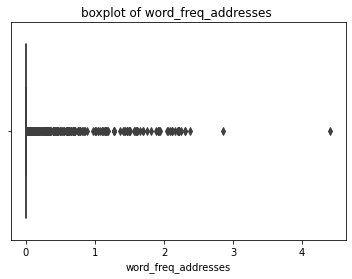

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


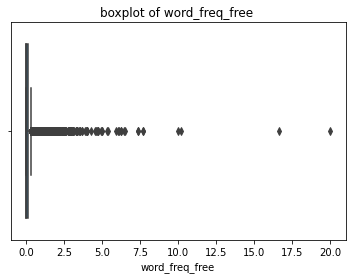

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


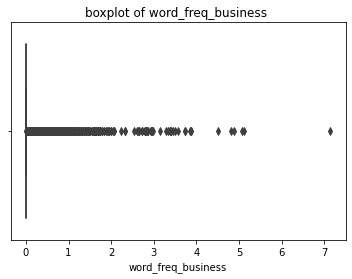

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


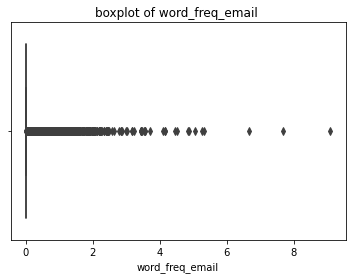

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


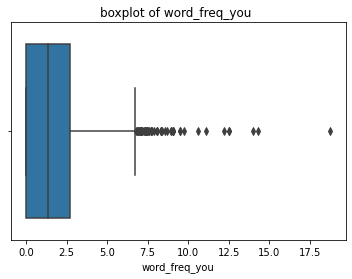

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


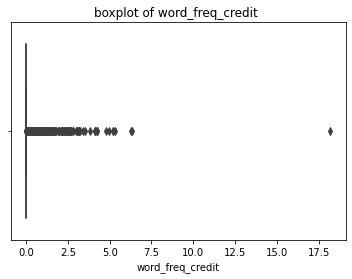

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


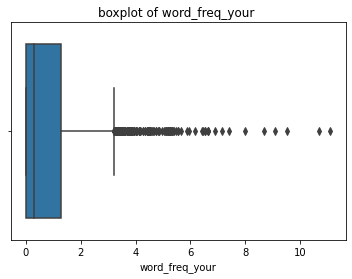

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


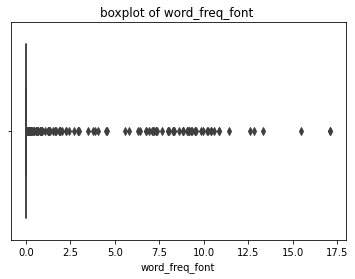

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


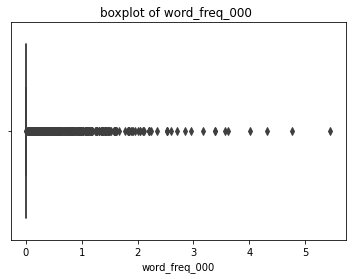

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


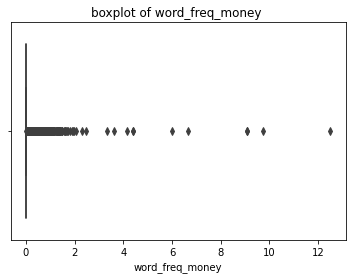

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


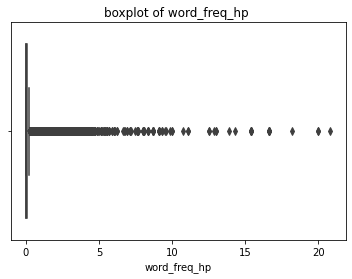

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


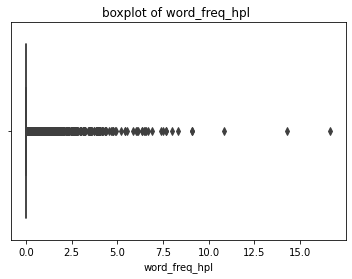

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


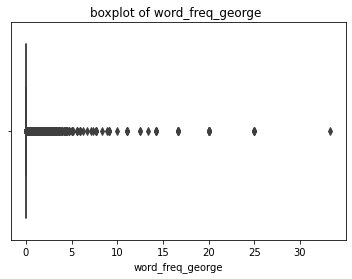

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


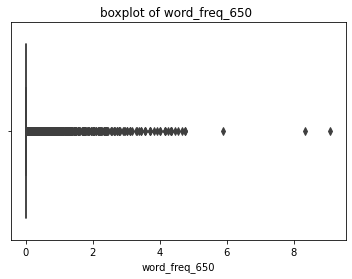

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


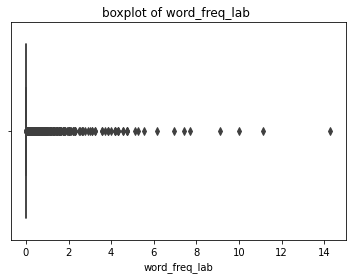

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


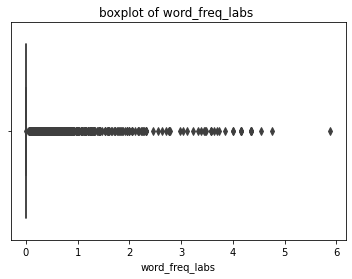

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


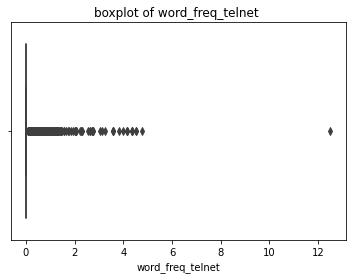

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


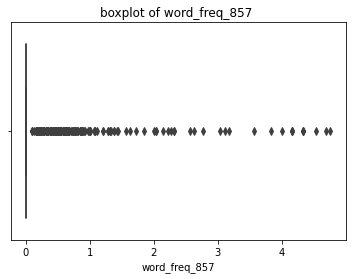

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


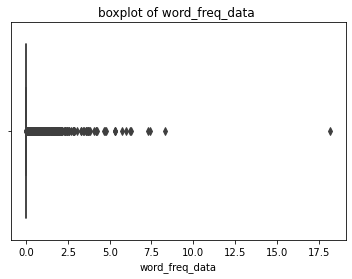

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


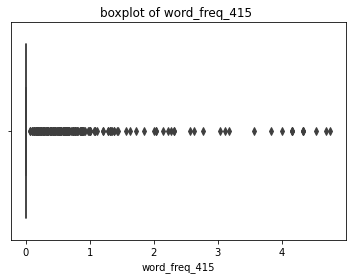

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


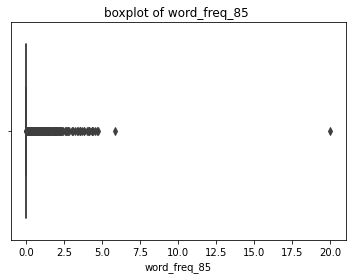

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


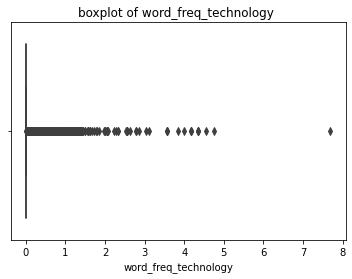

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


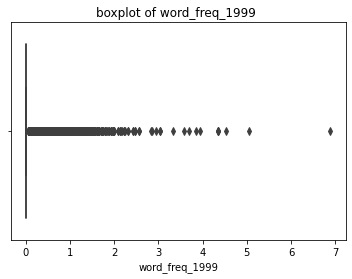

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


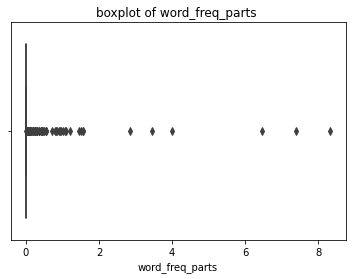

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


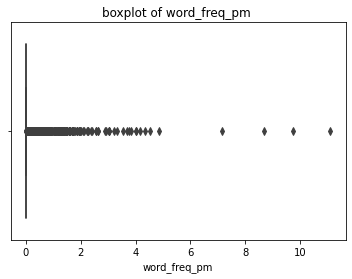

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


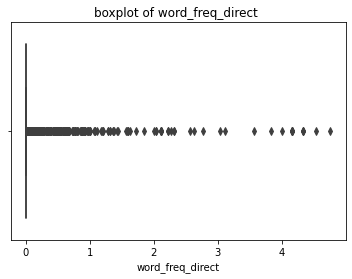

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


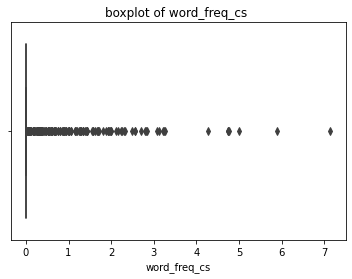

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


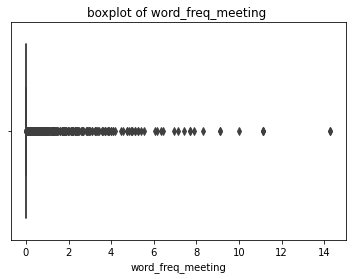

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


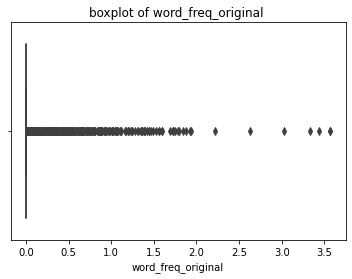

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


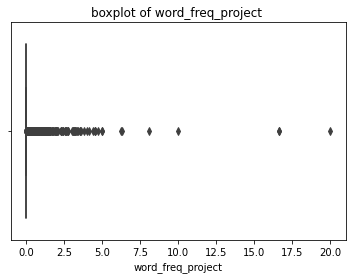

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


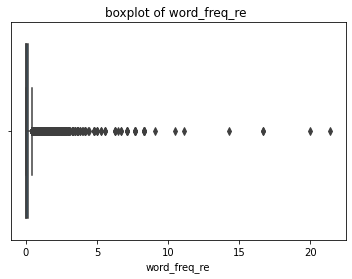

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


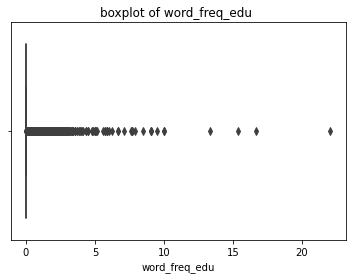

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


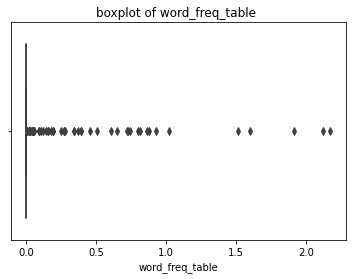

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


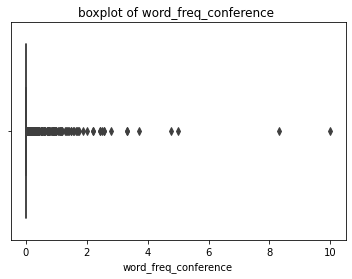

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


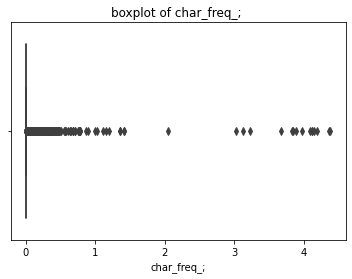

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


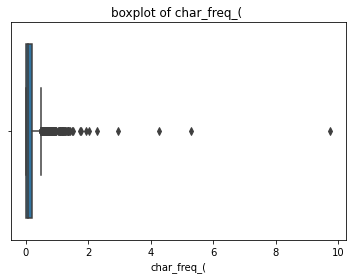

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


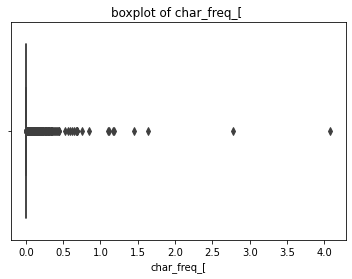

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


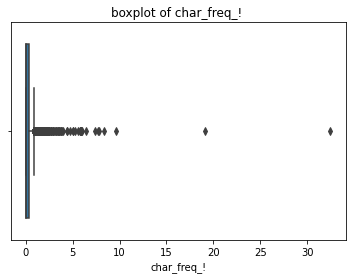

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


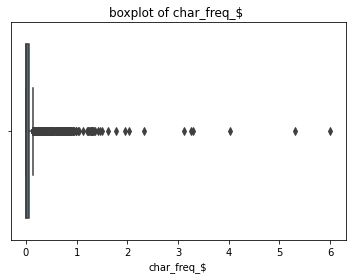

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


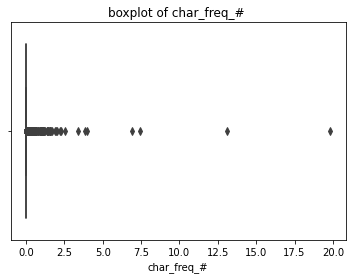

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


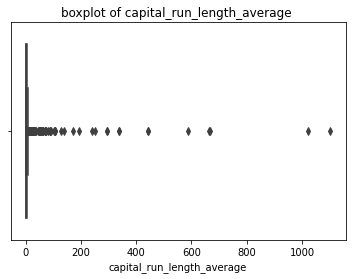

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


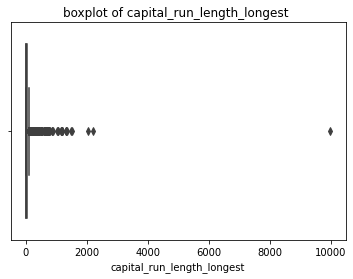

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


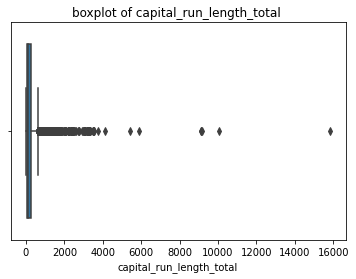

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


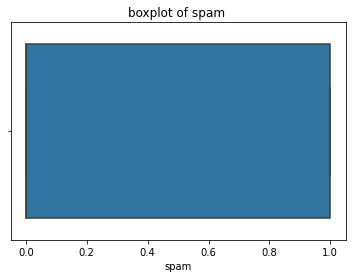

In [ ]:
for name in list(data.columns):
  plt.title(f'boxplot of {name} ')
  sns.boxplot(data[name])
  plt.show()

> There are quite a number of outliers this could stem from the fact that the emails in this dataset were collected from different users who had filed spam, therefore the content in the message would greatly varry, therefore no outliers will be removed

# Eda

## univarriate

In [ ]:
sns.set(rc={'figure.figsize':(18,6)},style="white")

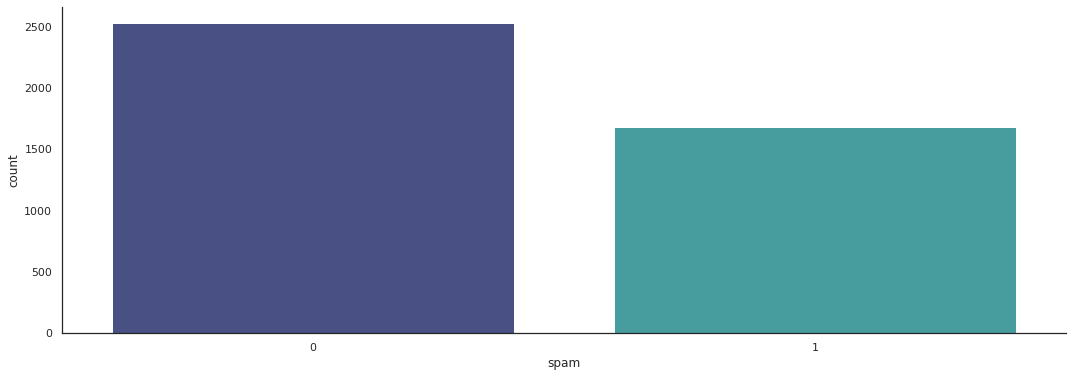

In [27]:
sns.countplot(x='spam',data=data,palette='mako')
sns.despine()

> quite a number of spam emails

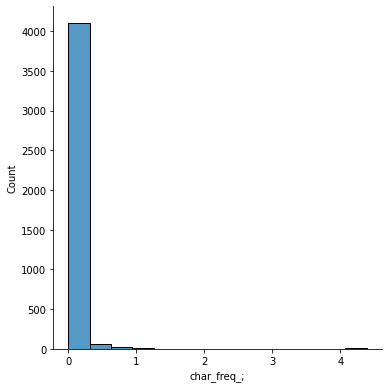

In [22]:
sns.displot(data['char_freq_;'],height=5.5)
sns.despine()

> The emails had ; with a frequency that lies within a a range of 0 to 1.5 with most being less than 0.5

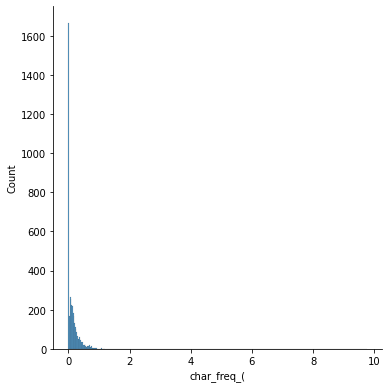

In [21]:
sns.displot(data['char_freq_('],height=5.5)
sns.despine()

> The emails had ( with a frequency that lies within a a range of 0 to 1 with most being less than 0.5

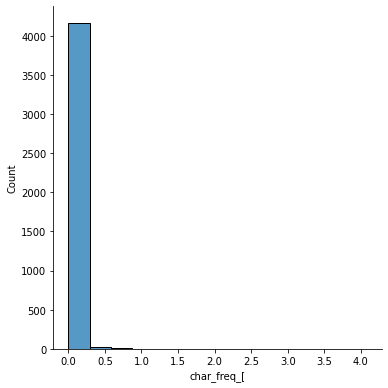

In [20]:
sns.displot(data['char_freq_['],height=5.5)
sns.despine()

> The emails had [ with a frequency that lies within a a range of 0 to 0.75 with most being less than 0.25

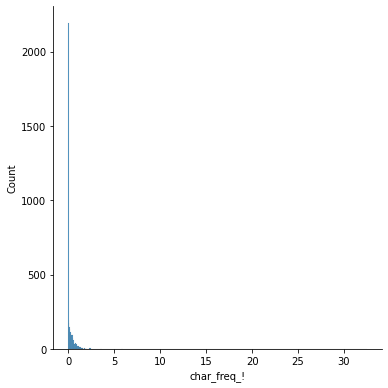

In [19]:
sns.displot(data['char_freq_!'],height=5.5)
sns.despine()

> The emails had ! with a frequency that lies within a range of 0 to 2.5 with most at 0

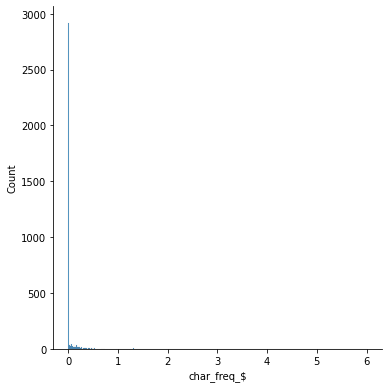

In [18]:
sns.displot(data['char_freq_$'],height=5.5)
sns.despine()

> The emails had $ with a frequency that lies within a range of 0 to 0.5 with most at 0

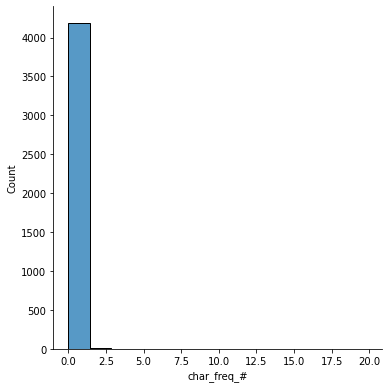

In [16]:
sns.displot(data['char_freq_#'],height=5.5)
sns.despine()

> The emails had # with a frequency that lies within a range of 0 to 2.5 with most being between 0 and 1.25

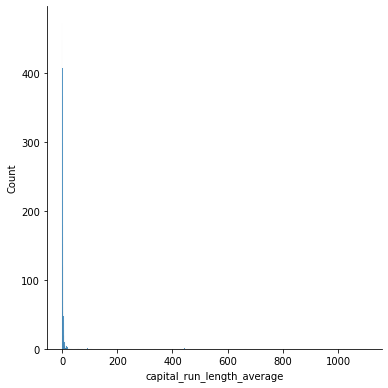

In [15]:
sns.displot(data['capital_run_length_average'],height=5.5)
sns.despine()

> The average length of uninterrupted sequences of capital letters was quite low

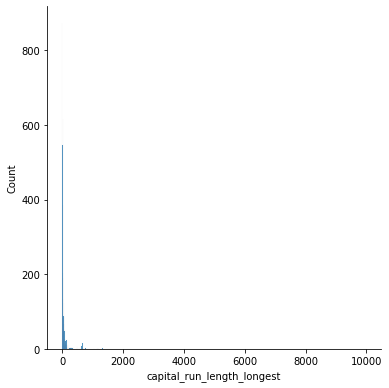

In [14]:
sns.displot(data['capital_run_length_longest'],height=5.5)
sns.despine()

> Most emails did not have long uninterrupted sequences of capital letters

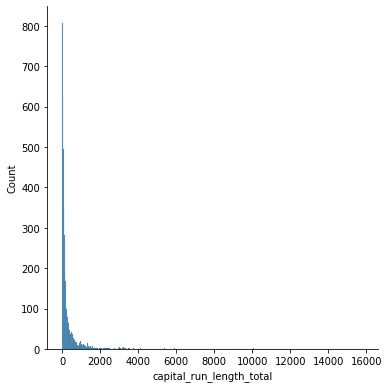

In [13]:
sns.displot(data['capital_run_length_total'],height=5.5)
sns.despine()

> Most emails had uninterrupted sequences of capital letters that was less than 1000

## bivarriate

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

* seting the style of the sns plots

In [25]:
sns.set(rc={'figure.figsize':(18,6)},style="white")

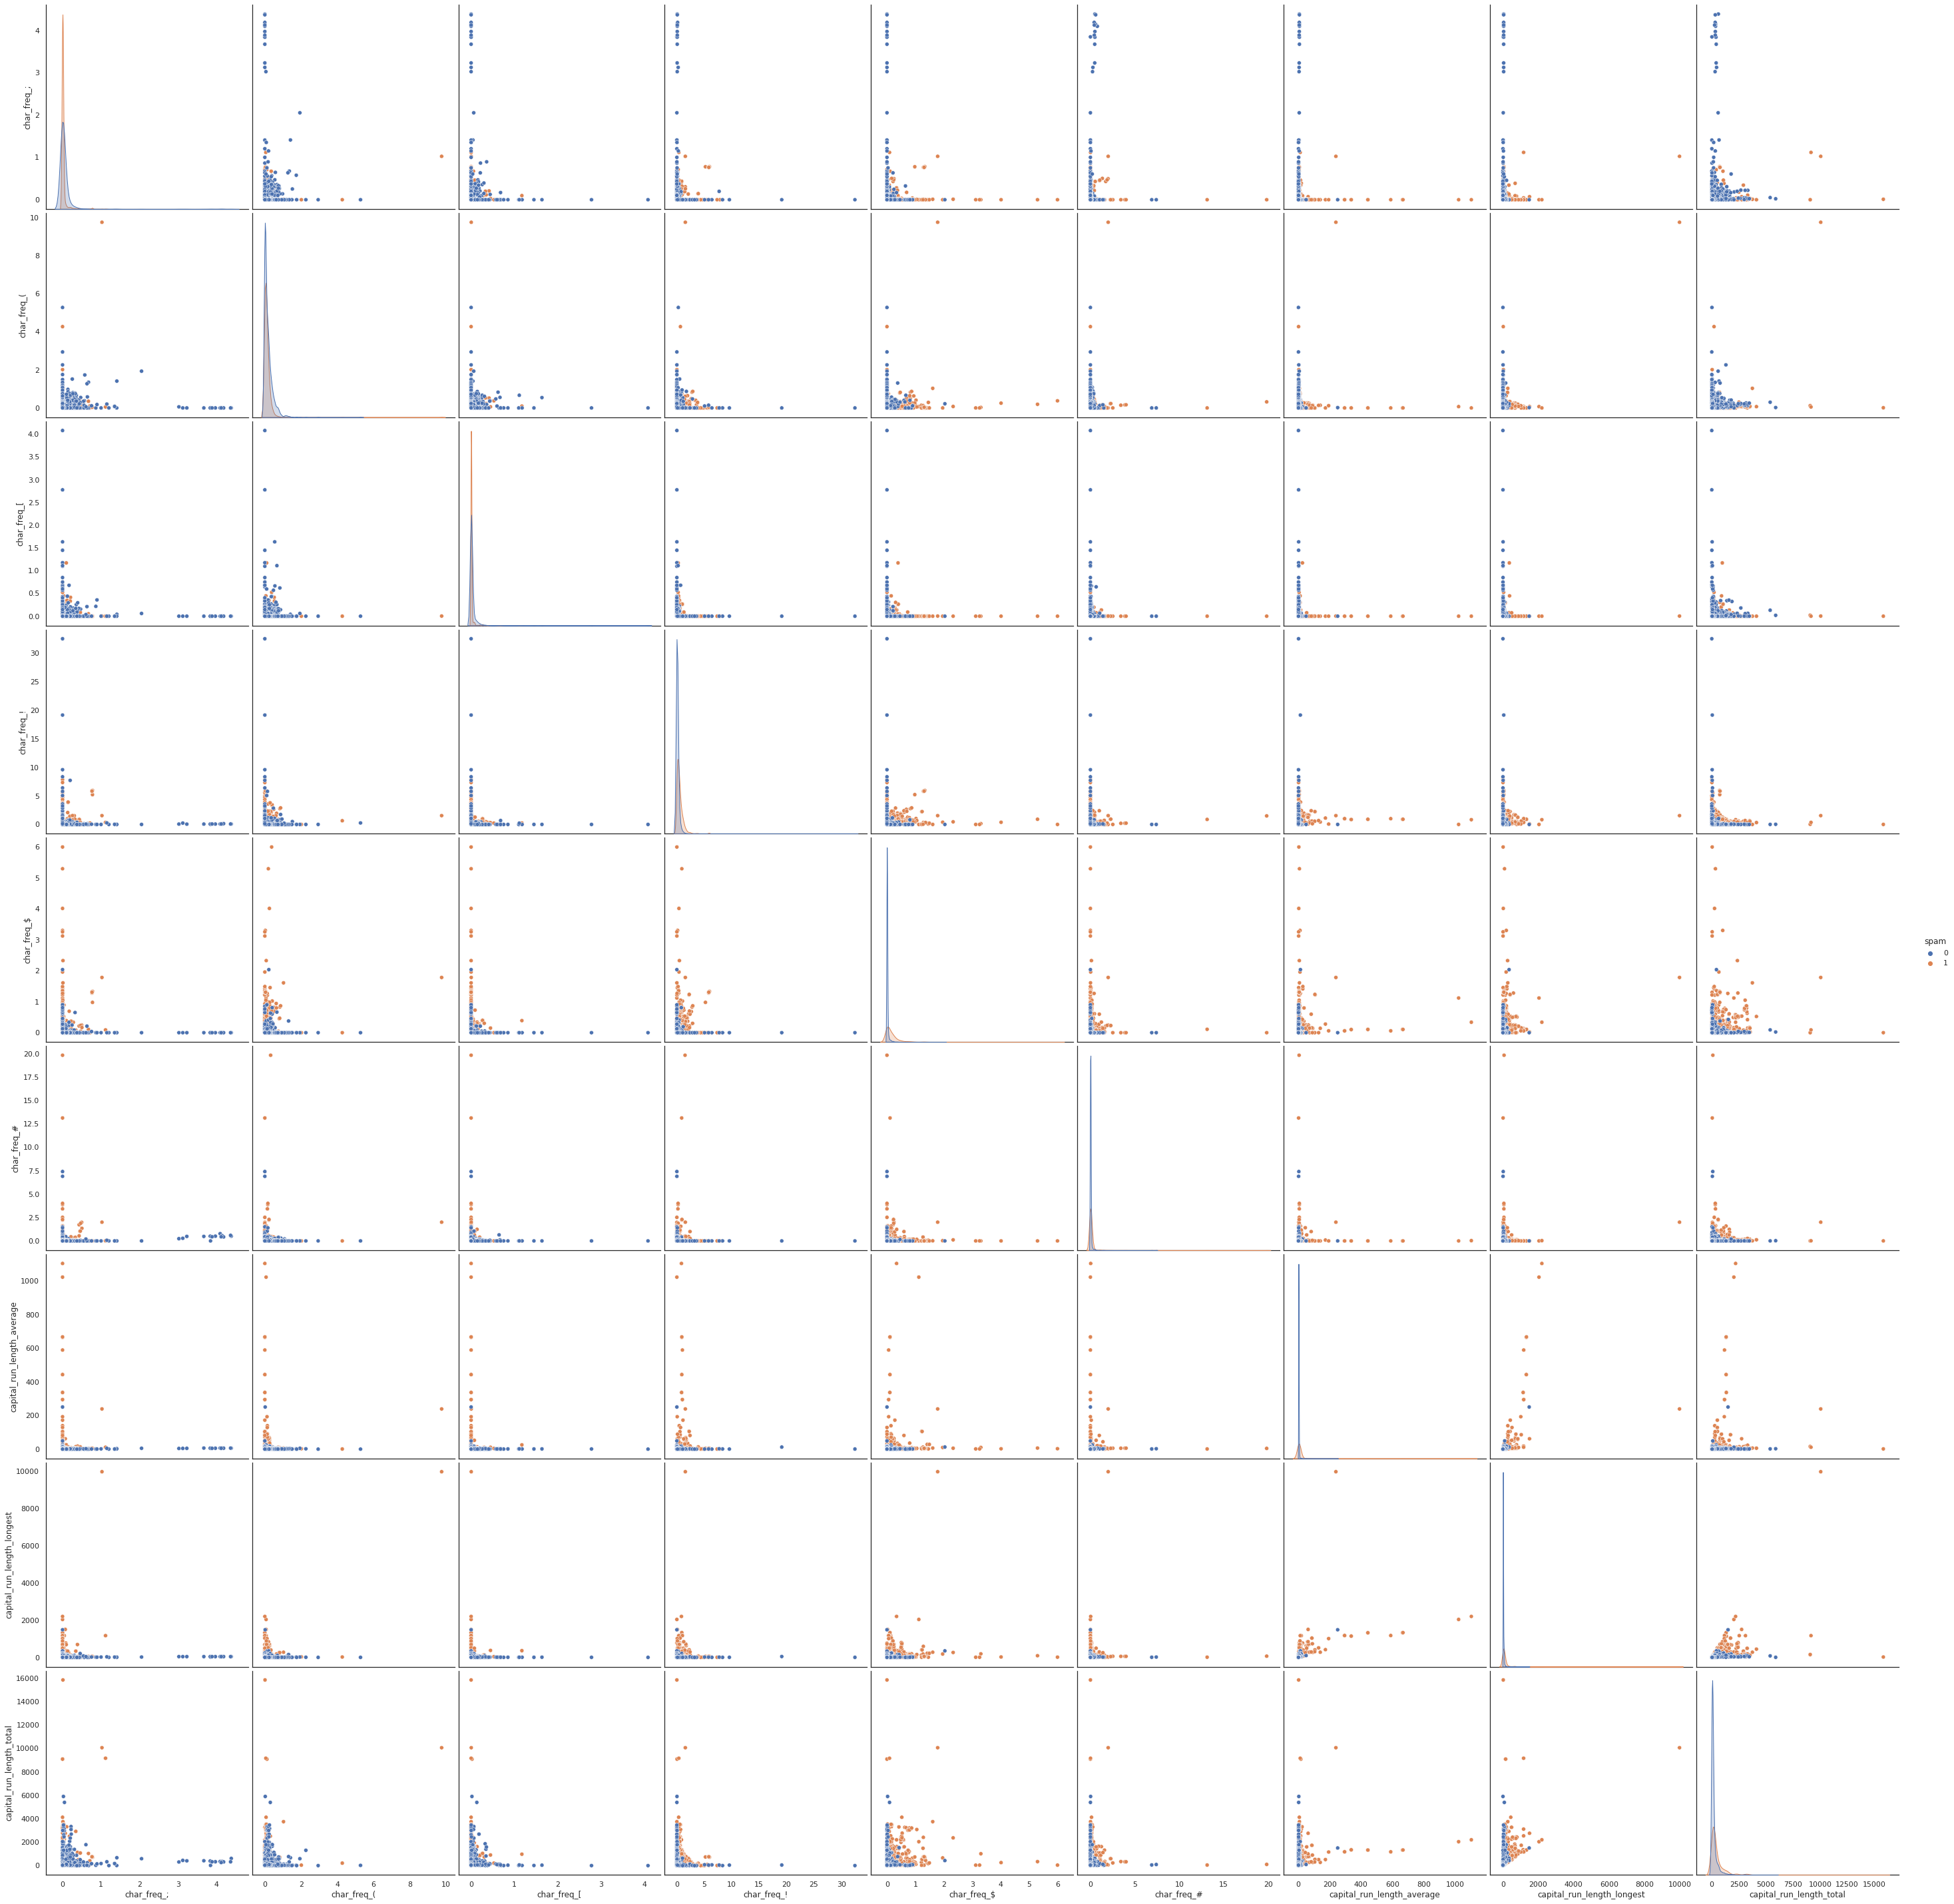

In [28]:
sns.pairplot(data.iloc[:,48:],hue='spam',height=4.5)
sns.despine()

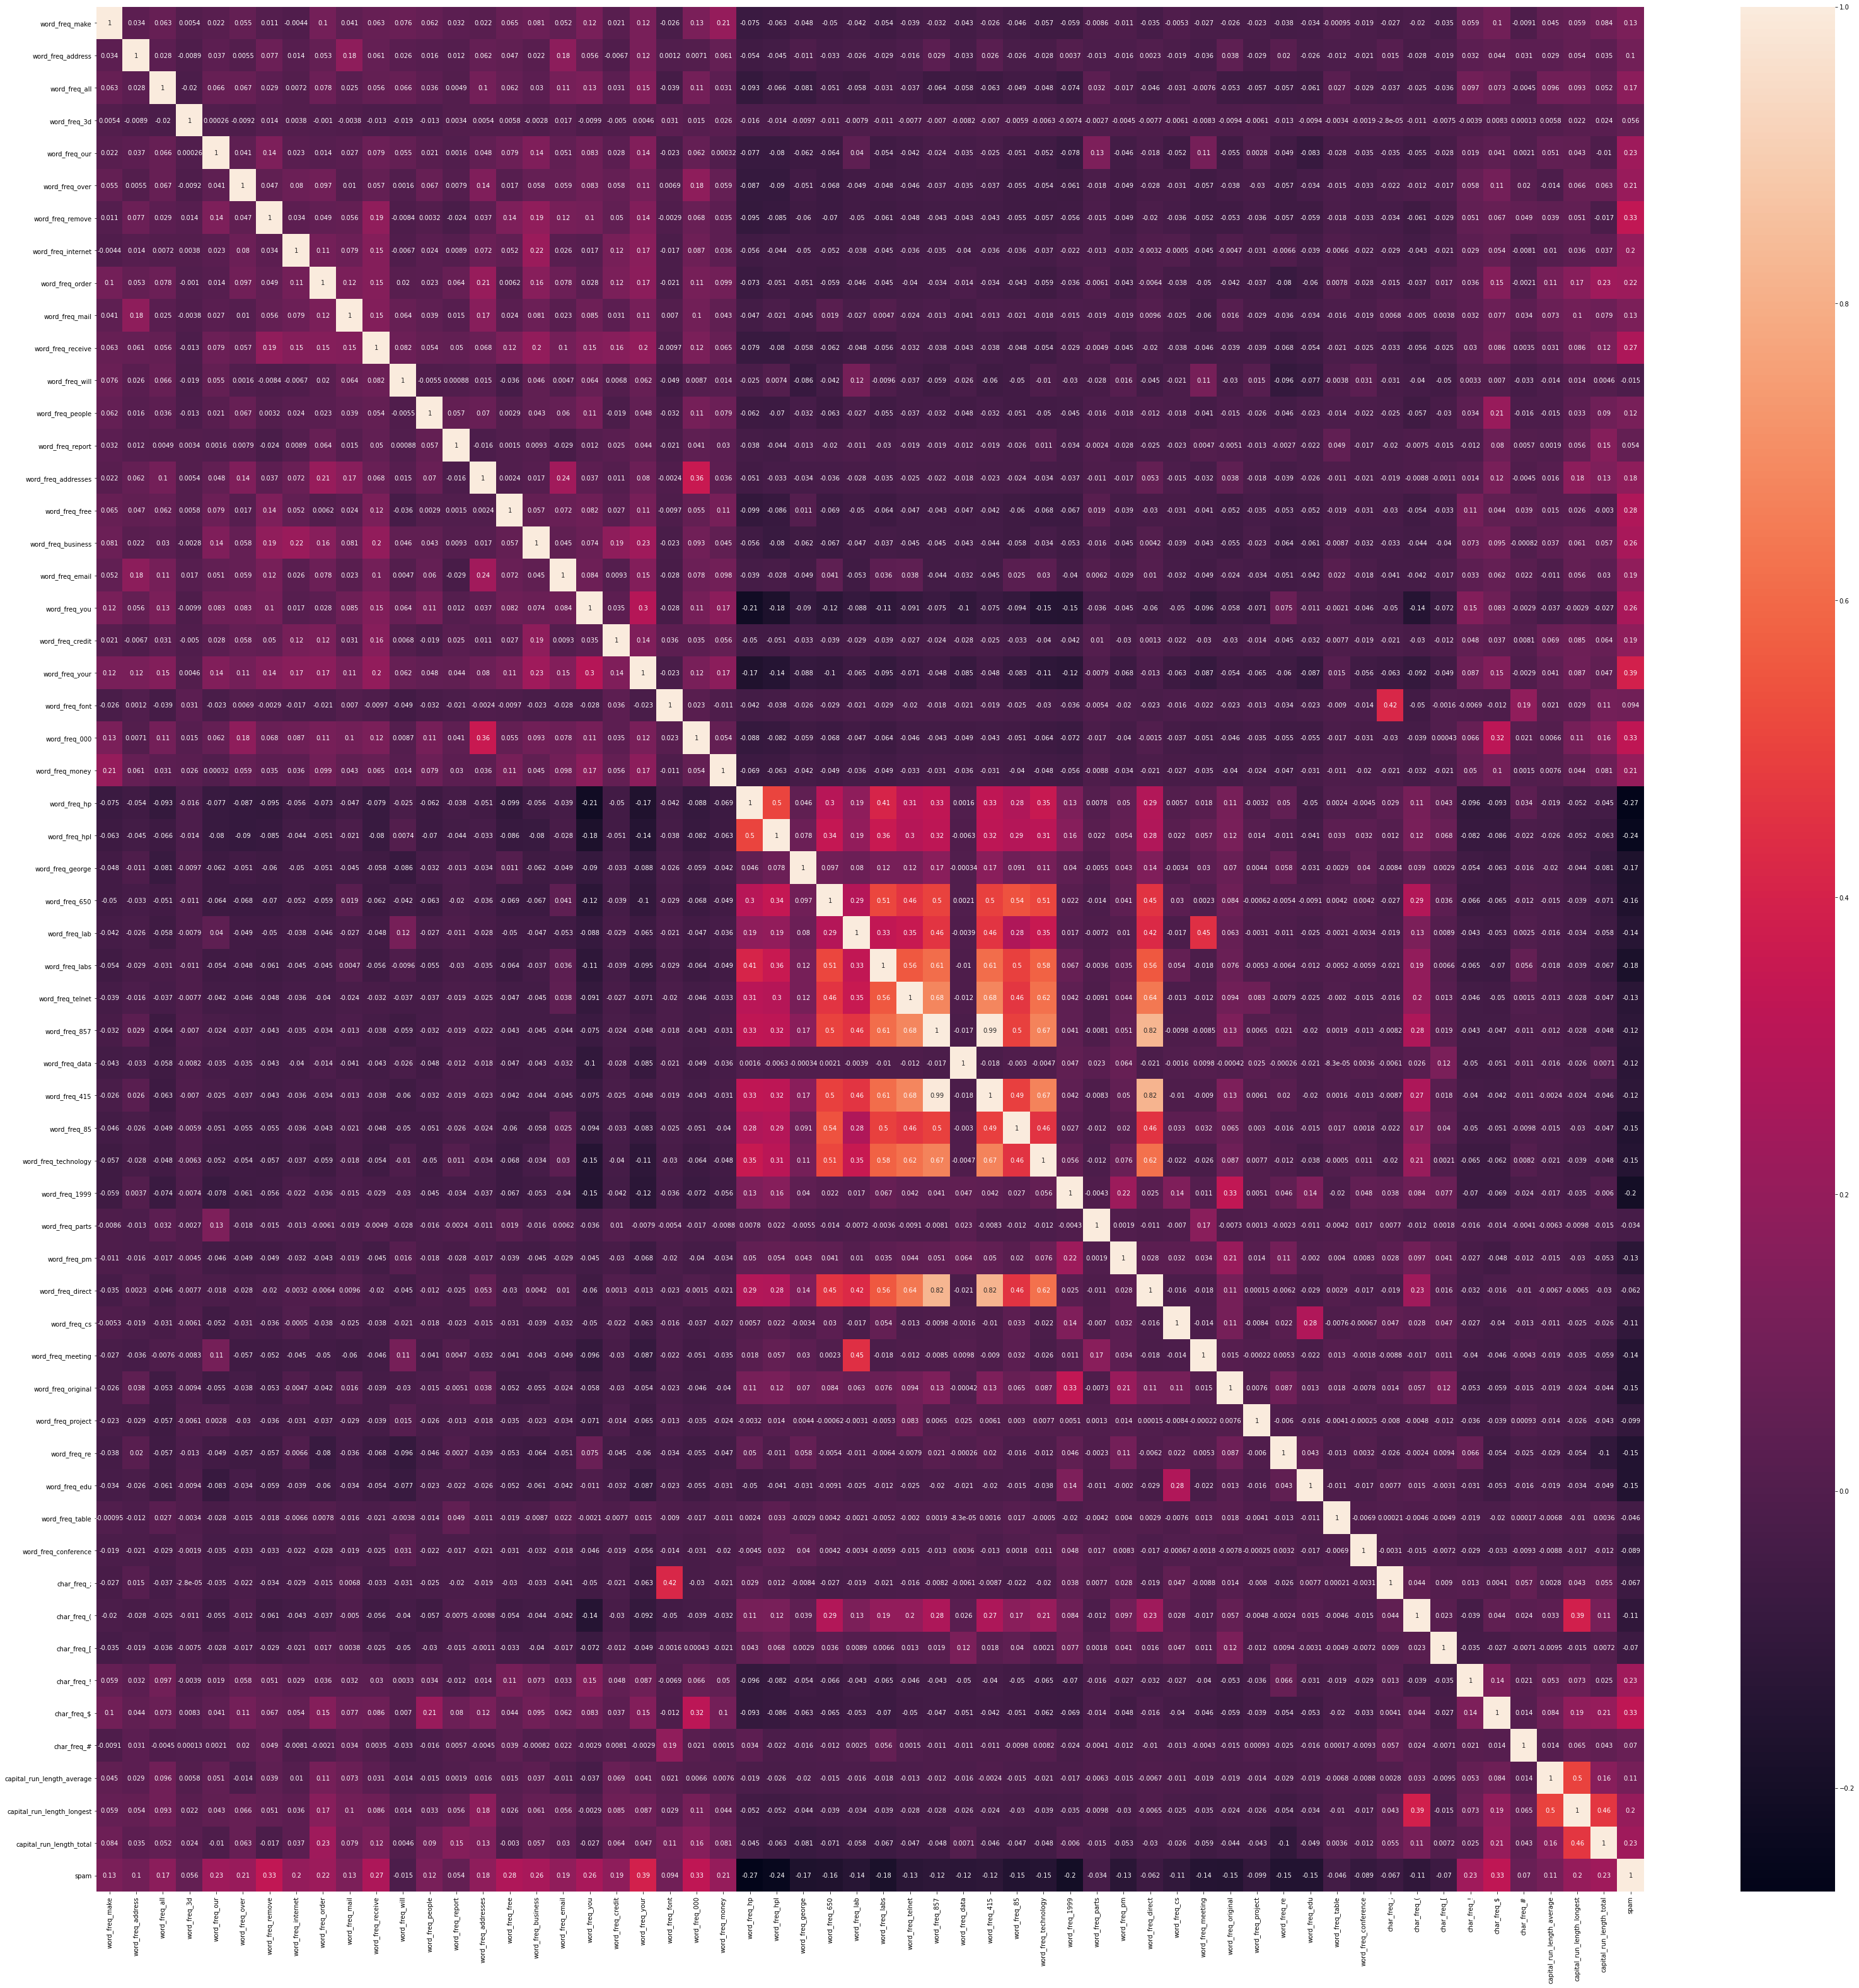

In [ ]:
plt.subplots(figsize=(55,55))
sns.heatmap(data.corr(),annot=True)

> THere is a high correlation of the word frequencies of telnet and labs

# Implementing the solution

* Importing the libraries

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [108]:
x=data.drop('spam',axis=1)
y=data['spam']
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [109]:
clf = GaussianNB( )
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8262108262108262


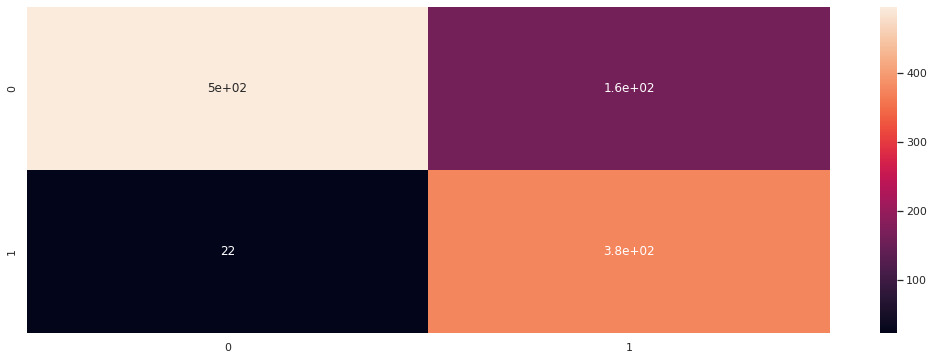

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       656
           1       0.70      0.94      0.80       397

    accuracy                           0.83      1053
   macro avg       0.83      0.85      0.82      1053
weighted avg       0.86      0.83      0.83      1053



In [110]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> An accuracy score of 0.82 its not too low to worry, but inorder to achieve an approximate error of 7 this has to be improved
*Further the precicion of predicting spam emails is really low

- removing highly correlated features

In [38]:
df=x.copy()
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(df[to_drop], axis=1,inplace=True)
df.shape,x.shape

((4210, 56), (4210, 57))

> one column was removed

In [111]:
y=data['spam']
x_train,x_test,y_train,y_test=train_test_split(df,y)

In [112]:
clf = GaussianNB()  
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8157644824311491


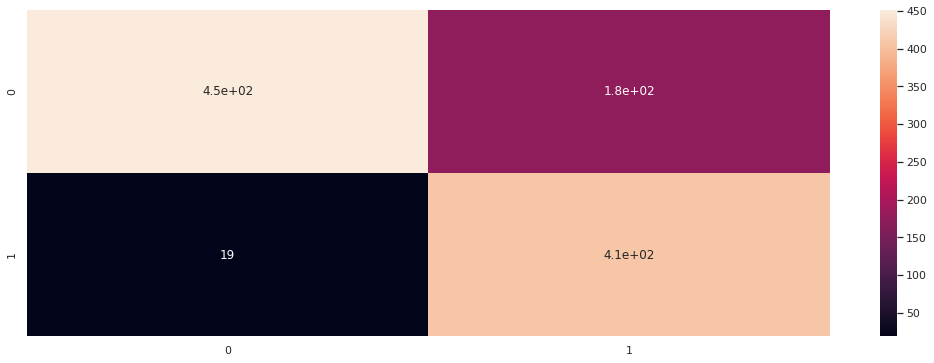

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       626
           1       0.70      0.96      0.81       427

    accuracy                           0.82      1053
   macro avg       0.83      0.84      0.82      1053
weighted avg       0.85      0.82      0.82      1053



In [113]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> The accuracy of the model is lower than the baseline meaning this method will not aid in improving accuracy

* Reducing the features to the most important

In [ ]:
data.shape

(4210, 58)

> 58 seem to be a bit too many

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
max=np.arange(1,10)
est=np.arange(100,1000,100)
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':est,'max_depth':max})
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

The best parameters  {'max_depth': 9, 'n_estimators': 900}


In [48]:
rforest = RandomForestClassifier(n_estimators=900, max_depth=9)
rforest = rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))
importance = pd.DataFrame({'feature': list(x_train.columns),
                           'importance': rforest.feature_importances_},index=None).sort_values('importance', ascending = False)
importance.head(30)

Accuracy  0.9430199430199431


,feature,importance
50,char_freq_!,0.121976
51,char_freq_$,0.108584
6,word_freq_remove,0.100216
15,word_freq_free,0.070219
53,capital_run_length_average,0.067728
54,capital_run_length_longest,0.057628
24,word_freq_hp,0.057147
20,word_freq_your,0.056486
23,word_freq_money,0.032807
55,capital_run_length_total,0.031793


> Some of the columns have a really low importance level, hence i will be testing to see if there is an impact with all above 0.005

In [51]:
importance.head(28)

,feature,importance
50,char_freq_!,0.121976
51,char_freq_$,0.108584
6,word_freq_remove,0.100216
15,word_freq_free,0.070219
53,capital_run_length_average,0.067728
54,capital_run_length_longest,0.057628
24,word_freq_hp,0.057147
20,word_freq_your,0.056486
23,word_freq_money,0.032807
55,capital_run_length_total,0.031793


In [ ]:
list(importance['feature'].head(29))

['char_freq_!',
 'char_freq_$',
 'word_freq_remove',
 'word_freq_free',
 'capital_run_length_average',
 'word_freq_hp',
 'word_freq_your',
 'capital_run_length_longest',
 'capital_run_length_total',
 'word_freq_money',
 'word_freq_000',
 'word_freq_our',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_edu',
 'word_freq_you',
 'word_freq_1999',
 'word_freq_receive',
 'word_freq_business',
 'word_freq_internet',
 'word_freq_all',
 'word_freq_re',
 'char_freq_(',
 'word_freq_will',
 'word_freq_over',
 'word_freq_mail',
 'word_freq_address',
 'word_freq_email',
 'word_freq_credit']

In [114]:
x=data[list(importance['feature'].head(27))]
y=data['spam']
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [115]:
clf = GaussianNB( )
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9097815764482431


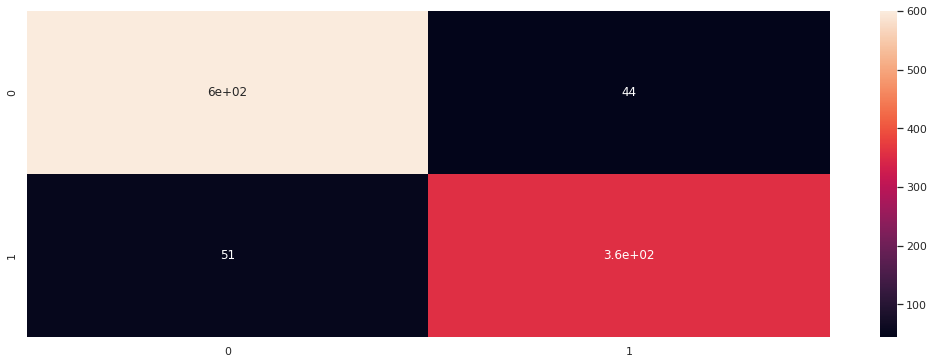

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       644
           1       0.89      0.88      0.88       409

    accuracy                           0.91      1053
   macro avg       0.91      0.90      0.90      1053
weighted avg       0.91      0.91      0.91      1053



In [116]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> Accuracy improved, because these are the most important features for this dataset.
* Precision in predicting non-spam emails has droped from 0.96 to 0.92
* Precision in predicting spam emails has improved from 0.70 to 0.89

**Now here lies the problem**
> If we insist on zero false positives in the training/testing set,25-30% of the spam passed through the filter.
* I will be going for higher accuracy to reduce the number of spam going through 😞 although more of the non-spam will end up being filtered out, But given the dangers of spam emails to client data and information, I believe it it worth it.


> Therefore I wil be using the features selected for my model

## Naive Bayes at 20% test size

In [105]:
x=data[list(importance['feature'].head(27))]
y=data['spam']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [106]:
clf = GaussianNB( )
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9168646080760094


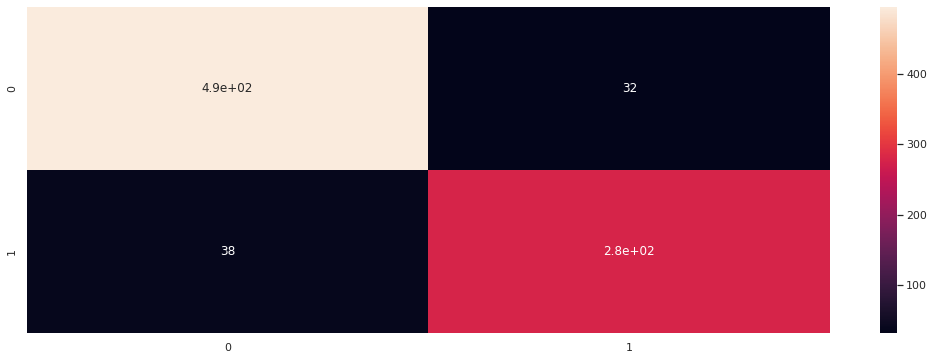

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       526
           1       0.90      0.88      0.89       316

    accuracy                           0.92       842
   macro avg       0.91      0.91      0.91       842
weighted avg       0.92      0.92      0.92       842



In [107]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> An accuracy of 0.9168
* Precicion of predicting non-spam: 0.93
* Precicion of predicting spam: 0.90

> Classification error of non spam emails is 0.07 == 7% , this model has met the set metric

## Naive Bayes at 30% test size

In [78]:
x=data[list(importance['feature'].head(27))]
y=data['spam']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [79]:
clf = GaussianNB( )
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9097387173396675


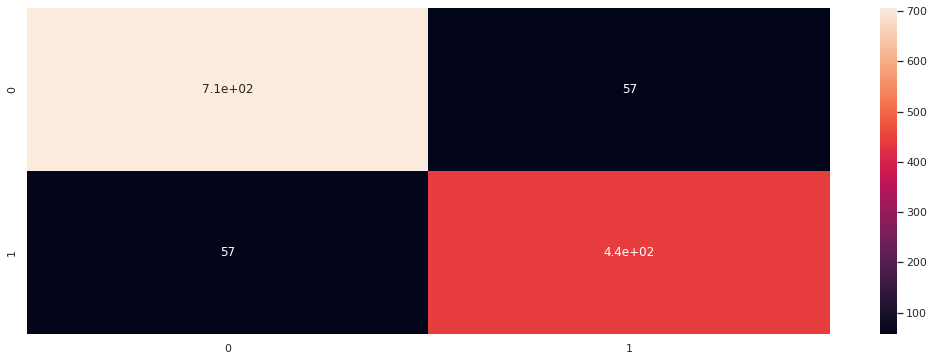

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       763
           1       0.89      0.89      0.89       500

    accuracy                           0.91      1263
   macro avg       0.91      0.91      0.91      1263
weighted avg       0.91      0.91      0.91      1263



In [80]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> An accuracy of 0.9097
* Precicion of predicting non-spam: 0.93
* Precicion of predicting spam: 0.89

> Imodel has peerformed worse than at 20%

## Naive Bayes at 40% test size

In [81]:
x=data[list(importance['feature'].head(27))]
y=data['spam']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4)

In [82]:
clf = GaussianNB( )
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9103325415676959


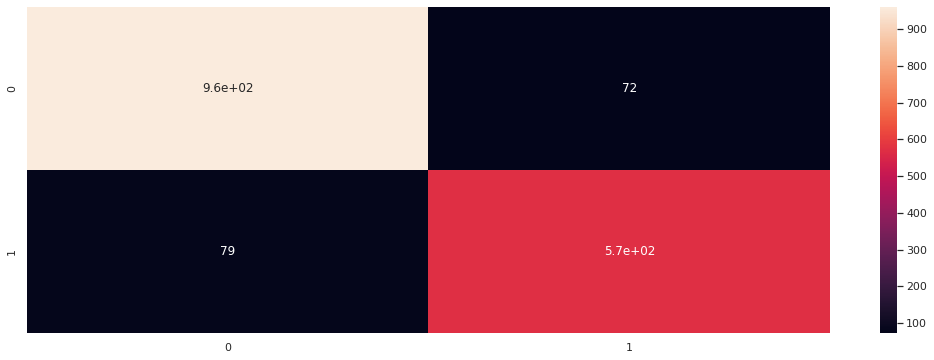

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1032
           1       0.89      0.88      0.88       652

    accuracy                           0.91      1684
   macro avg       0.91      0.90      0.91      1684
weighted avg       0.91      0.91      0.91      1684



In [83]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> An accuracy of 0.9103
* Precicion of predicting non-spam: 0.92
* Precicion of predicting spam: 0.89

> model has performed worse than at 20%

# Conclusion

> The model at 20% test size performed the best at 0.9168 accuracy however Precicion of predicting non-spam was at 0.93, around 7% of non spam emails ended up being filtered out

> Classification error of non spam emails is 0.07 == 7% , this model (at 20% as test size) met the set metric

# Challenging the solution

> The model did performed as i had hoped in that respect however it did have a decent accuracy.

* For this it would be good to try and use other classifier models to clasify the emails, inorder to evaluate the different performance levels.

# Follow up questions

## Did we have the right data?

Yes. The data was accurate based in the question

## Do we need other data to answer our question?

No, the data was enough to answer the question.

## Did we have the right question?

Yes, the question was appropriate for the data provided